In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install fitparse

In [5]:
# https://github.com/dtcooper/python-fitparse

import fitparse

# Load the FIT file
fitfile = fitparse.FitFile("../Downloads/zwift-activity-746637734667059248.fit")

# Iterate over all messages of type "record"
# (other types include "device_info", "file_creator", "event", etc)
for record in fitfile.get_messages("record"):

    # Records can contain multiple pieces of data (ex: timestamp, latitude, longitude, etc)
    for data in record:

        # Print the name and value of the data (and the units if it has any)
        if data.units:
            print(" * {}: {} ({})".format(data.name, data.value, data.units))
        else:
            print(" * {}: {}".format(data.name, data.value))

    print("---")
    break

 * altitude: 18.0 (m)
 * cadence: 90 (rpm)
 * compressed_speed_distance: None
 * cycle_length: None (m)
 * distance: 7.17 (m)
 * distance: None (m)
 * enhanced_altitude: 18.0 (m)
 * enhanced_speed: 6.926 (m/s)
 * grade: None (%)
 * heart_rate: 122 (bpm)
 * position_lat: 614548048 (semicircles)
 * position_long: -907939 (semicircles)
 * power: 146 (watts)
 * resistance: None
 * speed: None (m/s)
 * speed: 6.926 (m/s)
 * temperature: None (C)
 * time_from_course: None (s)
 * timestamp: 2021-02-10 00:00:25
---


In [8]:
fitfile = fitparse.FitFile("../Downloads/zwift-activity-746637734667059248.fit")

In [10]:
fitfile.messages

[<DataMessage: file_id (#0) -- local mesg: #0, fields: [serial_number: None, time_created: 2021-02-09 23:52:51, manufacturer: zwift, product: 0, number: 0, type: activity]>,
 <DataMessage: device_info (#23) -- local mesg: #1, fields: [timestamp: 2015-01-06 22:08:25, serial_number: 3825981698, cum_operating_time: 0, manufacturer: zwift, product: 0, software_version: 5.62, battery_voltage: 0.0, device_index: creator, device_type: 0, hardware_version: 0, battery_status: 0]>,
 <DataMessage: event (#21) -- local mesg: #2, fields: [timestamp: 2021-02-10 00:00:24, timer_trigger: manual, timer_trigger: manual, data16: 0, event: timer, event_type: start, event_group: 0]>,
 <DataMessage: record (#20) -- local mesg: #3, fields: [timestamp: 2021-02-10 00:00:25, position_lat: 614548048, position_long: -907939, distance: 7.17, time_from_course: None, speed: None, distance: None, compressed_speed_distance: None, heart_rate: 122, enhanced_altitude: 18.0, altitude: 18.0, enhanced_speed: 6.926, speed: 6

In [13]:
for message in fitfile.messages:
    if message.name != 'record':
        print(message)

file_id (#0)
device_info (#23)
event (#21)
event (#21)
lap (#19)
session (#18)
activity (#34)


In [17]:
for type_name in ['file_id','device_info','event','lap','session','activity']:
    print(type_name)
    print('----')
    for record in fitfile.get_messages(type_name):
        display(record)

file_id
----


<DataMessage: file_id (#0) -- local mesg: #0, fields: [serial_number: None, time_created: 2021-02-09 23:52:51, manufacturer: zwift, product: 0, number: 0, type: activity]>

device_info
----


<DataMessage: device_info (#23) -- local mesg: #1, fields: [timestamp: 2015-01-06 22:08:25, serial_number: 3825981698, cum_operating_time: 0, manufacturer: zwift, product: 0, software_version: 5.62, battery_voltage: 0.0, device_index: creator, device_type: 0, hardware_version: 0, battery_status: 0]>

event
----


<DataMessage: event (#21) -- local mesg: #2, fields: [timestamp: 2021-02-10 00:00:24, timer_trigger: manual, timer_trigger: manual, data16: 0, event: timer, event_type: start, event_group: 0]>

<DataMessage: event (#21) -- local mesg: #2, fields: [timestamp: 2021-02-10 01:04:12, timer_trigger: manual, timer_trigger: manual, data16: 0, event: timer, event_type: stop_all, event_group: 0]>

lap
----


<DataMessage: lap (#19) -- local mesg: #4, fields: [timestamp: 2021-02-10 01:04:02, start_time: 2021-02-10 00:00:24, start_position_lat: 0, start_position_long: 0, end_position_lat: 0, end_position_long: 0, total_elapsed_time: 3818.0, total_timer_time: 3819.0, total_distance: 37347.83, total_cycles: 0, message_index: 0, total_calories: 0, total_fat_calories: 0, enhanced_avg_speed: 9.779, avg_speed: 9.779, enhanced_max_speed: 15.141, max_speed: 15.141, avg_power: 160, max_power: 316, total_ascent: 0, total_descent: 0, event: lap, event_type: stop, avg_heart_rate: 139, max_heart_rate: 157, avg_cadence: 80, max_cadence: 98, intensity: active, lap_trigger: manual, sport: cycling, event_group: 0]>

session
----


<DataMessage: session (#18) -- local mesg: #5, fields: [timestamp: 2021-02-10 01:04:12, start_time: 2021-02-10 00:00:24, start_position_lat: 0, start_position_long: 0, total_elapsed_time: 3818.0, total_timer_time: 3819.0, total_distance: 37347.83, total_cycles: 0, nec_lat: 0, nec_long: 0, swc_lat: 0, swc_long: 0, message_index: 0, total_calories: 609, total_fat_calories: 0, enhanced_avg_speed: 9.779, avg_speed: 9.779, enhanced_max_speed: 15.141, max_speed: 15.141, avg_power: 160, max_power: 316, total_ascent: 128, total_descent: 0, first_lap_index: 0, num_laps: 1, event: session, event_type: stop, sport: cycling, sub_sport: virtual_activity, avg_heart_rate: 139, max_heart_rate: 157, avg_cadence: 80, max_cadence: 98, total_training_effect: 0.0, event_group: 0, trigger: activity_end]>

activity
----


<DataMessage: activity (#34) -- local mesg: #6, fields: [timestamp: 2021-02-10 01:04:12, total_timer_time: 3819.0, local_timestamp: 1989-12-31 00:00:00, num_sessions: 1, type: manual, event: activity, event_type: stop, event_group: 0]>

In [32]:
series = []

for record in fitfile.get_messages("record"):

    # Records can contain multiple pieces of data (ex: timestamp, latitude, longitude, etc)
    row = {
        'altitude': np.NAN,
        'cadence': np.NAN,
        'distance': np.NAN,
        'heart_rate': np.NAN,
        'power': np.NAN,
        'speed': np.NAN,
        'timestamp': np.NAN
    }
    for data in record:
        # Print the name and value of the data (and the units if it has any)
        if data.name in ['altitude','cadence','distance','heart_rate','power','speed','timestamp']:
            row[data.name] = data.value
            
    if row['timestamp']:
        series += [row]

In [34]:
len(series)

3819

In [37]:
df = pd.DataFrame(series)
df = df.set_index('timestamp')
df

,altitude,cadence,distance,heart_rate,power,speed
timestamp,,,,,,
2021-02-10 00:00:25,18.0,90,None,122,146,6.926
2021-02-10 00:00:26,18.0,90,None,122,142,7.085
2021-02-10 00:00:27,18.0,90,None,122,142,7.233
2021-02-10 00:00:28,18.0,90,None,122,149,7.378
2021-02-10 00:00:29,18.0,90,None,122,151,7.563
...,...,...,...,...,...,...
2021-02-10 01:03:59,24.6,0,None,114,0,1.239
2021-02-10 01:04:00,24.6,0,None,113,0,0.493
2021-02-10 01:04:01,24.6,0,None,112,0,0.000


In [40]:
import matplotlib
%matplotlib inline

<AxesSubplot:xlabel='timestamp'>

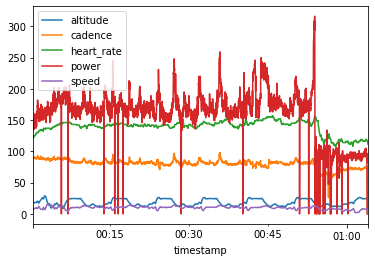

In [41]:
df.plot()